In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# Remove all patients from sources besides ED, OR/PACU, and ICU

In [2]:
# Read in CSV file

df = pd.read_csv("Transfers.csv")

In [3]:
# Print the first 5 columns of CSV file

df.head()

,Patient_id,Location,Patient_Ready,Bed_Request,Bed_Assignment,Transfer,Unit,Floor_Number,Room_Number,Time_Out_of_Unit
0,4846,ED,1/1/12 0:16,1/1/12 0:02,1/1/12 0:50,1/1/12 1:51,ICU,L06,L0636,1/3/12 14:41
1,4781,Other ICU,1/1/12 9:41,1/1/12 12:13,1/1/12 12:13,1/1/12 12:13,ICU,L06,L0632,1/10/12 0:28
2,4797,ICU,1/1/12 14:11,1/1/12 14:41,1/1/12 12:57,1/1/12 14:11,Floor,L07,L0764,1/3/12 16:59
3,4832,ICU,1/1/12 15:55,1/1/12 16:27,1/1/12 14:59,1/1/12 15:55,Floor,L08,L0884,1/2/12 11:56
4,4848,ED,1/1/12 15:15,1/1/12 15:38,1/1/12 16:12,1/1/12 16:59,Floor,L07,L0760,1/5/12 15:57


In [4]:
# Look at all of the values that "Location" column
# can take on

df["Location"].value_counts()

OR/PACU         3642
ED              3317
ICU             2088
Front Door      1397
Other Floor      503
Other ICU        339
Floor            187
Other PACU        23
Other PACU 2       5
Name: Location, dtype: int64

In [5]:
# How many rows, columns does our data file have?

df.shape

(11501, 10)

In [6]:
# Only look at the rows for which Location is one of
# ['OR/PACU', 'ED', "ICU"]

df_shortened = df[(df["Location"] == 'OR/PACU') | (df["Location"] == 'ED') | (df["Location"] == 'ICU')]

In [7]:
# Confirm with before that the values of the
# locations of interest did not change

df_shortened["Location"].value_counts()

OR/PACU    3642
ED         3317
ICU        2088
Name: Location, dtype: int64

In [8]:
# How many rows, columns does our new data file have?

df_shortened.shape

(9047, 10)

# See how many patients have beds assigned before requested

Create the following new columns to perform this analysis:
- ReadyToTransfer = Patient Ready to Transfer time in words
- BedReqToAssign = Bed requested to assigned in words
- BedReqToAssignInMinutes = Bed requested to assigned in minutes

In [9]:
df = df_shortened

In [10]:
df['Patient_Ready'] = pd.to_datetime(df['Patient_Ready'])
df['Bed_Request'] = pd.to_datetime(df['Bed_Request'])
df['Bed_Assignment'] = pd.to_datetime(df['Bed_Assignment'])
df['Transfer'] = pd.to_datetime(df['Transfer'])

In [11]:
df.head()

,Patient_id,Location,Patient_Ready,Bed_Request,Bed_Assignment,Transfer,Unit,Floor_Number,Room_Number,Time_Out_of_Unit
0,4846,ED,2012-01-01 00:16:00,2012-01-01 00:02:00,2012-01-01 00:50:00,2012-01-01 01:51:00,ICU,L06,L0636,1/3/12 14:41
2,4797,ICU,2012-01-01 14:11:00,2012-01-01 14:41:00,2012-01-01 12:57:00,2012-01-01 14:11:00,Floor,L07,L0764,1/3/12 16:59
3,4832,ICU,2012-01-01 15:55:00,2012-01-01 16:27:00,2012-01-01 14:59:00,2012-01-01 15:55:00,Floor,L08,L0884,1/2/12 11:56
4,4848,ED,2012-01-01 15:15:00,2012-01-01 15:38:00,2012-01-01 16:12:00,2012-01-01 16:59:00,Floor,L07,L0760,1/5/12 15:57
5,4835,ICU,2012-01-01 17:31:00,2012-01-01 18:17:00,2012-01-01 16:32:00,2012-01-01 17:31:00,Floor,L07,L0762,1/2/12 12:41


In [12]:
df['ReadyToTransfer'] = df['Transfer'] - df['Patient_Ready']
df['ReadyToTransferInMinutes'] = df['ReadyToTransfer'].dt.total_seconds().div(60).astype(int)



In [13]:
df['BedReqToAssign'] = df['Bed_Assignment'] - df['Bed_Request']
df['BedReqToAssignInMinutes'] = df['BedReqToAssign'].dt.total_seconds().div(60).astype(int)

In [14]:
df.head()

,Patient_id,Location,Patient_Ready,Bed_Request,Bed_Assignment,Transfer,Unit,Floor_Number,Room_Number,Time_Out_of_Unit,ReadyToTransfer,ReadyToTransferInMinutes,BedReqToAssign,BedReqToAssignInMinutes
0,4846,ED,2012-01-01 00:16:00,2012-01-01 00:02:00,2012-01-01 00:50:00,2012-01-01 01:51:00,ICU,L06,L0636,1/3/12 14:41,01:35:00,95,00:48:00,48
2,4797,ICU,2012-01-01 14:11:00,2012-01-01 14:41:00,2012-01-01 12:57:00,2012-01-01 14:11:00,Floor,L07,L0764,1/3/12 16:59,00:00:00,0,-1 days +22:16:00,-104
3,4832,ICU,2012-01-01 15:55:00,2012-01-01 16:27:00,2012-01-01 14:59:00,2012-01-01 15:55:00,Floor,L08,L0884,1/2/12 11:56,00:00:00,0,-1 days +22:32:00,-88
4,4848,ED,2012-01-01 15:15:00,2012-01-01 15:38:00,2012-01-01 16:12:00,2012-01-01 16:59:00,Floor,L07,L0760,1/5/12 15:57,01:44:00,104,00:34:00,34
5,4835,ICU,2012-01-01 17:31:00,2012-01-01 18:17:00,2012-01-01 16:32:00,2012-01-01 17:31:00,Floor,L07,L0762,1/2/12 12:41,00:00:00,0,-1 days +22:15:00,-105


In [15]:
df.to_csv("ShortenedTransfers.csv")

In [16]:
df["BedReqToAssignInMinutes"].describe()

count     9047.000000
mean       220.046203
std        513.441261
min       -135.000000
25%         28.000000
50%         38.000000
75%        195.000000
max      13728.000000
Name: BedReqToAssignInMinutes, dtype: float64

In [17]:
# Count how many patients had a bed request to assignment
# time greater than 48 hours

df[df["BedReqToAssignInMinutes"] > 24*60].shape

(321, 14)

In [18]:
# Count how many patients had a bed request time after
# bed assignment time

df[df["BedReqToAssignInMinutes"] <0].shape

(684, 14)

In [19]:
# Of the patients who had a bed request time after bed
# assignment time, look at where their sources were

df[df["BedReqToAssignInMinutes"] <0]['Location'].value_counts()

ED     468
ICU    216
Name: Location, dtype: int64

# Filter dataframe on conditions

In [20]:
# Create a new dataframe called new_df where we look at
# only the patients with bed request to assignment time
# between 0 and 48 hours, and patient ready to transfer
# time between 0 and 16 hours

new_df = df[df["BedReqToAssignInMinutes"] >=0]
new_df = new_df[new_df["BedReqToAssignInMinutes"] < 24*60]
new_df = new_df[new_df["ReadyToTransferInMinutes"] < 16*60]

In [21]:
new_df["BedReqToAssignInMinutes"].describe()

count    7852.000000
mean      135.520886
std       179.632048
min         0.000000
25%        29.000000
50%        38.000000
75%       170.000000
max       969.000000
Name: BedReqToAssignInMinutes, dtype: float64

In [22]:
new_df["ReadyToTransferInMinutes"].describe()

count    7852.000000
mean      171.514137
std       203.585130
min        13.000000
25%        31.000000
50%        76.000000
75%       238.000000
max       959.000000
Name: ReadyToTransferInMinutes, dtype: float64

# Initial analysis

Look at by location and unit, what is the distribution of the bed request to assignment time in minutes in terms of count, mean, and standard deviation

In [23]:
new_df.groupby(by=['Location', 'Unit'])['BedReqToAssignInMinutes'].count()

Location  Unit 
ED        Floor    1988
          ICU       765
ICU       Floor    1457
OR/PACU   Floor    1982
          ICU      1660
Name: BedReqToAssignInMinutes, dtype: int64

In [24]:
new_df.groupby(by=['Location', 'Unit'])['BedReqToAssignInMinutes'].mean()

Location  Unit 
ED        Floor    200.306338
          ICU      118.105882
ICU       Floor    319.668497
OR/PACU   Floor     30.244702
          ICU       30.028916
Name: BedReqToAssignInMinutes, dtype: float64

In [25]:
new_df.groupby(by=['Location', 'Unit'])['BedReqToAssignInMinutes'].std()

Location  Unit 
ED        Floor    213.838978
          ICU      116.525992
ICU       Floor    191.773946
OR/PACU   Floor      6.045441
          ICU        5.833464
Name: BedReqToAssignInMinutes, dtype: float64

In [26]:
new_df.groupby(by=['Floor_Number', 'Location', 'Unit'])['BedReqToAssignInMinutes'].mean()

Floor_Number  Location  Unit 
L06           ED        ICU      118.105882
              OR/PACU   ICU       30.028916
L07           ED        Floor    206.693202
              ICU       Floor    312.772277
              OR/PACU   Floor     30.078111
L08           ED        Floor    192.098851
              ICU       Floor    328.254237
              OR/PACU   Floor     30.452894
Name: BedReqToAssignInMinutes, dtype: float64

# Trend analysis

Look at by day of year, what is the average wait time from ED to Floor, ED to ICU, ICU to Floor, OR/PACU to Floor, and OR/PACU to ICU

In [27]:
# Helper method to get a subset of data by location and unit

def get_subset_of_data(data, location, unit):
    return data[(data["Location"] == location) & (data["Unit"] == unit)]

In [28]:
# Create new columns for day of week, week of year, season

new_df['Date'] = new_df['Bed_Request'].dt.date
new_df['DayOfWeek'] = new_df['Bed_Request'].dt.day_name()
new_df['DayOfWeekNum'] = new_df['Bed_Request'].dt.dayofweek
new_df['WeekOfYearNum'] = new_df['Bed_Request'].dt.week
new_df['Month'] = new_df['Bed_Request'].dt.month

# 1=Winter, 2=Spring, 3=Summer, 4=Autumn
new_df['Season'] = new_df['Bed_Request'].dt.month%12 // 3 + 1 

In [29]:
# Create groupby objects

gb_dayofwk = new_df.groupby(by=['Location', 'Unit', 'DayOfWeekNum', 'DayOfWeek'])['BedReqToAssignInMinutes'].mean().reset_index()

gb_wkofyr = new_df.groupby(by=['Location', 'Unit', 'WeekOfYearNum'])['BedReqToAssignInMinutes'].mean().reset_index()

gb_month = new_df.groupby(by=['Location', 'Unit', 'Month'])['BedReqToAssignInMinutes'].mean().reset_index()

gb_season = new_df.groupby(by=['Location', 'Unit', 'Season'])['BedReqToAssignInMinutes'].mean().reset_index()



In [30]:
gb_season

,Location,Unit,Season,BedReqToAssignInMinutes
0,ED,Floor,1,194.933333
1,ED,Floor,2,182.826562
2,ED,Floor,3,189.599156
3,ED,Floor,4,260.633229
4,ED,ICU,1,111.174888
5,ED,ICU,2,127.980620
6,ED,ICU,3,103.285714
7,ED,ICU,4,125.555556
8,ICU,Floor,1,287.309824
9,ICU,Floor,2,321.609284


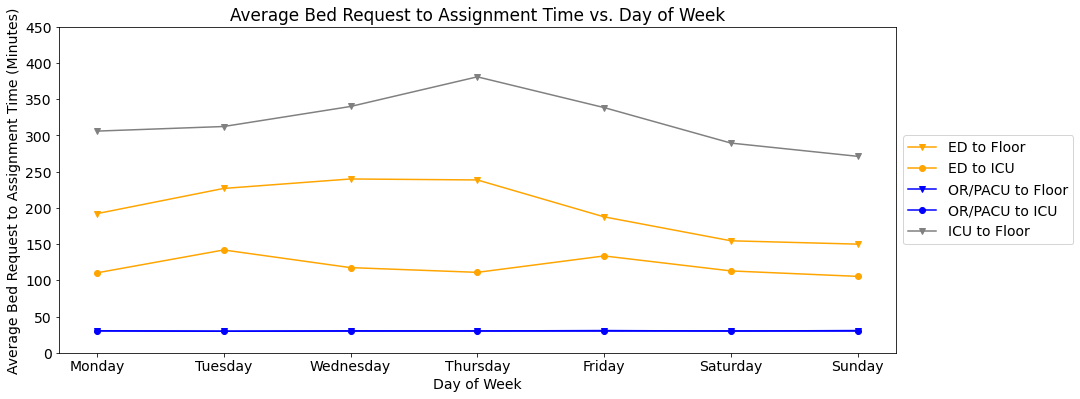

In [31]:
fig, ax = plt.subplots(figsize=(15,6))

ed_to_floor = get_subset_of_data(gb_dayofwk, 'ED', 'Floor')
ed_to_icu = get_subset_of_data(gb_dayofwk, 'ED', 'ICU')
or_to_icu = get_subset_of_data(gb_dayofwk, 'OR/PACU', 'ICU')
or_to_floor = get_subset_of_data(gb_dayofwk, 'OR/PACU', 'Floor')
icu_to_floor = get_subset_of_data(gb_dayofwk, 'ICU', 'Floor')
    
plt.plot(ed_to_floor['DayOfWeekNum'], ed_to_floor['BedReqToAssignInMinutes'], marker='v', color='orange', label='ED to Floor')
plt.plot(ed_to_icu['DayOfWeekNum'], ed_to_icu['BedReqToAssignInMinutes'], marker='o', color='orange', label='ED to ICU')
plt.plot(or_to_icu['DayOfWeekNum'], or_to_icu['BedReqToAssignInMinutes'], marker='v', color='blue', label='OR/PACU to Floor')
plt.plot(or_to_floor['DayOfWeekNum'], or_to_floor['BedReqToAssignInMinutes'], marker='o', color='blue', label='OR/PACU to ICU')
plt.plot(icu_to_floor['DayOfWeekNum'], icu_to_floor['BedReqToAssignInMinutes'], marker='v', color='gray', label='ICU to Floor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Day of Week")
plt.ylabel("Average Bed Request to Assignment Time (Minutes)")
plt.title("Average Bed Request to Assignment Time vs. Day of Week")

ax.set_xticklabels([0, "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.ylim((0,450))

plt.show()


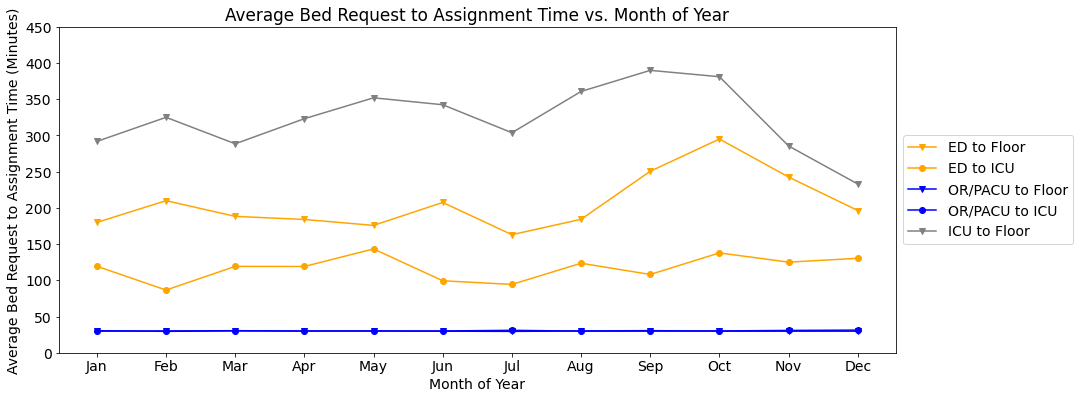

In [32]:
fig, ax = plt.subplots(figsize=(15,6))

ed_to_floor = get_subset_of_data(gb_month, 'ED', 'Floor')
ed_to_icu = get_subset_of_data(gb_month, 'ED', 'ICU')
or_to_icu = get_subset_of_data(gb_month, 'OR/PACU', 'ICU')
or_to_floor = get_subset_of_data(gb_month, 'OR/PACU', 'Floor')
icu_to_floor = get_subset_of_data(gb_month, 'ICU', 'Floor')
    
plt.plot(ed_to_floor['Month'], ed_to_floor['BedReqToAssignInMinutes'], marker='v', color='orange', label='ED to Floor')
plt.plot(ed_to_icu['Month'], ed_to_icu['BedReqToAssignInMinutes'], marker='o', color='orange', label='ED to ICU')
plt.plot(or_to_icu['Month'], or_to_icu['BedReqToAssignInMinutes'], marker='v', color='blue', label='OR/PACU to Floor')
plt.plot(or_to_floor['Month'], or_to_floor['BedReqToAssignInMinutes'], marker='o', color='blue', label='OR/PACU to ICU')
plt.plot(icu_to_floor['Month'], icu_to_floor['BedReqToAssignInMinutes'], marker='v', color='gray', label='ICU to Floor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Average Bed Request to Assignment Time vs. Month of Year")
plt.xlabel("Month of Year")
plt.ylabel("Average Bed Request to Assignment Time (Minutes)")
plt.ylim((0,450))

plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()


In [33]:
new_df.groupby(by=['Location', 'Unit', 'DayOfWeek'])['BedReqToAssignInMinutes'].mean()

Location  Unit   DayOfWeek
ED        Floor  Friday       187.544586
                 Monday       191.969595
                 Saturday     154.528369
                 Sunday       149.918182
                 Thursday     238.488136
                 Tuesday      226.781250
                 Wednesday    239.832765
          ICU    Friday       133.634783
                 Monday       110.290909
                 Saturday     112.953488
                 Sunday       105.427419
                 Thursday     110.991150
                 Tuesday      141.879121
                 Wednesday    117.518072
ICU       Floor  Friday       338.315353
                 Monday       305.872180
                 Saturday     289.345324
                 Sunday       271.062112
                 Thursday     380.748634
                 Tuesday      312.204819
                 Wednesday    339.844340
OR/PACU   Floor  Friday        30.710956
                 Monday        30.396476
                 Saturday     

In [34]:
new_df.groupby(by=['Location', 'Unit', 'Season'])['BedReqToAssignInMinutes'].mean()

Location  Unit   Season
ED        Floor  1         194.933333
                 2         182.826562
                 3         189.599156
                 4         260.633229
          ICU    1         111.174888
                 2         127.980620
                 3         103.285714
                 4         125.555556
ICU       Floor  1         287.309824
                 2         321.609284
                 3         337.833333
                 4         347.396135
OR/PACU   Floor  1          30.241636
                 2          30.194678
                 3          30.274775
                 4          30.328671
          ICU    1          29.997680
                 2          30.142857
                 3          29.848806
                 4          30.083333
Name: BedReqToAssignInMinutes, dtype: float64